#Metodo de la Inversion
## Distribuciones Discretas
### Distribucion Binomial

####Funcion de Probabilidad
$$F(x)=\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

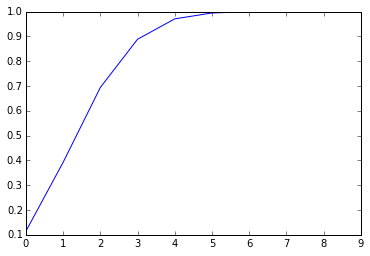

In [48]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

x=10
s1=17
s2=27
def genale(x):
    x0=x*10
    x0=((75*x0))%((2**16)+1)
    Ux=float(x0)/((2**16)+1)
    return Ux

def genalev(N):
    Ux=[]
    x=0
    x0=7
    while x<N:
        x0=((5*x0)+3)%607
        x=x+1
        Ux.append(float(x0)/607)
    return Ux

p=genale(s1)

#funcion de probabilidad binomial
def funprobbin(x,p):
    y=[]
    for i in range(x):
        y.append((math.factorial(x)/(math.factorial(i)*math.factorial(x-i)))*(p**i)*(1-p)**(x-i))
    return y

fpb=funprobbin(x,p)
#funcion acumulada binomial
def funacumbin():
    y=[]
    y.append(fpb[0])
    for i in range(x-1):
        y.append(fpb[i+1]+y[i])
    return y

fab=funacumbin()

plt.plot(fab)

In [49]:
#funcion inversa binomial
def finbin(x):
    p=[]
    p=genalev(x)
    pi=[]
    for i in range(x):
        for j in range(len(fab)):
            if p[i]<fab[j]:
                pi.append(j)
                break
    return pi      

finb=finbin(x)
print finb


[0, 1, 2, 5, 4, 2, 2, 1, 4, 2]


### Distribucion Geometrica

####Funcion de Probabilidad
$$F(x)=p(1-p)^{x-1}$$

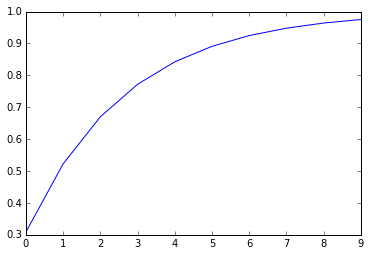

In [50]:
p=genale(s2)
def funprobgeo(x,p):
    y=[]
    for i in range(x+1):
        y.append(p*(1-p)**(i))
    return y

fpg=funprobgeo(x,p)

def funacumgeo():
    y=[]
    y.append(fpg[0])
    for i in range(x-1):
        y.append(fpg[i+1]+y[i])
    return y

fag=funacumgeo()


plt.plot(fag)

In [51]:
#funcion inversa binomial
def fingeo(x):
    p=[]
    p=genalev(x)
    pi=[]
    for i in range(x):
        for j in range(len(fag)):
            if p[i]<fag[j]:
                pi.append(j)
                break
    return pi      

fing=fingeo(x)
print fing

[0, 1, 2, 6, 1, 1, 1, 7, 2]


### Distribucion Uniforme Discreta

####Funcion de Probabilidad
$$F(x)=\frac{1}{x}$$

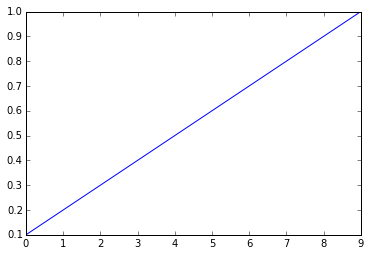

In [52]:
#Funcion de probabilidad Uniforme Discreta
def funprobun(x):
    fpu=[]
    for i in range(x):
        fpu.append(1/float(x))
    return fpu

fpu=funprobun(x)
   
def funacumun(x):
    facu=[]
    facu.append(fpu[0])
    for i in range(x-1):
        facu.append(fpu[i+1]+facu[i])
    return facu

facu=funacumun(x)
plt.plot(facu)

In [53]:
#funcion inversa Uniforme
def finun(x):
    p=[]
    p=genalev(x)
    pi=[]
    for i in range(x):
        for j in range(len(facu)):
            if p[i]<facu[j]:
                pi.append(j)
                break
    return pi      

fing=finun(x)
print fing

[0, 3, 5, 9, 8, 4, 4, 3, 9, 6]


##Distribuciones Continuas
### Distribucion Exponencial

####Funcion de Probabilidad
$$F(x)=\lambda e^{- \lambda x}$$
####Funcion cuantil de la Distribucion exponencial
$$F^{-1}(x)=\frac{-ln(1-p)}{\lambda}$$

In [54]:
lam=1

def funprobexp(l,x):
    lm=[]
    for i in range(x):
        lm.append(l*math.exp(-l*i))
    return lm
fpe=funprobexp(lam,x)

def funcuanexp(x,l):
    p=[]
    p=genalev(x)
    pi=[]
    for i in range(x):
        pi.append(-math.log10(1-p[i])/l)
    return pi

fcue=funcuanexp(x,lam)
for i in range(len(fcue)):
    print "{0:.2f}".format(fcue[i])

0.03
0.17
0.39
1.67
0.99
0.30
0.28
0.21
1.17
0.48


### Distribucion Cauchy

####Funcion de Probabilidad
$$F(x)=\frac{1} {\pi}arctan(\frac{x-xo}{\gamma})+\frac{1}{2}$$

####Funcion Cuantil de la Distribucion Cauchy
$$F(x)=xo+\gamma tan[\pi (p-\frac{1}{2})]$$

In [57]:
def funcuancau(x,xo,g):
    p=[]
    p=genalev(x)
    pi=[]
    for i in range(x):
        pi.append(xo+g*math.tan(math.pi*(p[i]-(1/2))))
    return pi

fcuc=funcuancau(x,0,1)
for i in range(len(fcuc)):
    print "{0:.2f}".format(fcuc[i])

0.20
1.55
-3.26
-0.07
-0.33
55.20
13.30
2.66
-0.22
-1.73


### Distribucion Erlang

####Funcion de Probabilidad
$$F(x)=\frac{\lambda ^{r}x^{r-1} e ^{\lambda x}}{(r-1)!}$$